<a href="https://colab.research.google.com/github/kolla118/KOLLA_INFO5731_Spring2020-/blob/main/INFO5731_Assignment_Four_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [1]:
import pandas as pd
from google.colab import files
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import LdaModel
from nltk.tokenize import RegexpTokenizer
from gensim.models.coherencemodel import CoherenceModel

In [2]:
iphone_reviews = pd.read_csv('/content/iphone_reviews .csv')
print(iphone_reviews.Reviews)

0                              Katherine1.0 out of 5 stars
1                                       Not FULLY Unlocked
2        Reviewed in the United States on February 13, ...
3                                                      NaN
4          Purchased this product advertised as fully u...
                               ...                        
58987                                                  NaN
58988                                                  NaN
58989                                                  NaN
58990                                         Report abuse
58991                          Translate review to English
Name: Reviews, Length: 58992, dtype: object


In [4]:
# Write your code here

import os
import tweepy as tw
import pandas as pd
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

words = set(nltk.corpus.words.words())

def get_lemmatized_docs(X):
  stemmer = WordNetLemmatizer()
  eng_stop_word_list = stopwords.words("english")
  bag_of_words = []
  for sen in range(0, len(X)):
      # removing all the special characters
      document = re.sub(r'\W', ' ', str(X[sen]))

      # removing all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

      # removing multiple spaces and adding single space in place
      document = re.sub(r'\s+', ' ', document, flags=re.I)

      # removing the 'b' prefix added during byte conversion
      document = re.sub(r'^b\s+', '', document)

      # removing numbers
      document = re.sub(r'\d+','',document)

      # converting all words to lowercase
      document = document.lower()
      
      # Splitting the cleaned document into a list of words, which will be subsequently added to a bag after more processing
      document = document.split()
      document = [stemmer.lemmatize(word) for word in document]
      document = [word for word in document if word not in eng_stop_word_list]
      document = ' '.join(document)

      document = [word for word in nltk.wordpunct_tokenize(document) if word.lower() in words or not word.isalpha()]

      #Bag of words
      bag_of_words.append(document)

  return bag_of_words

df = pd.read_csv('iphone_reviews .csv')
#df.dropna(how='any', inplace=True)
clean_docs  = get_lemmatized_docs(df["Reviews"])
print(len(clean_docs))
print(clean_docs)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
58992
[['star'], ['fully', 'unlocked'], ['united', 'state', 'size', 'provider', 'grade', 'purchase'], ['nan'], ['product', 'fully', 'unlocked', 'inserted', 'card', 'work', 'service', 'provider', 'checked', 'number', 'phone', 'wa', 'still', 'locked', 'original', 'carrier', 'phone', 'came', 'good', 'condition', 'use', 'service', 'provider'], ['nan'], ['nan'], ['people', 'found', 'helpful'], ['nan'], ['helpful'], ['nan'], ['nan'], ['report', 'abuse'], ['nan'], ['showing', 'comment'], ['wa', 'problem', 'loading', 'comment', 'right', 'please', 'try', 'later', 'star'], ['great', 'purchase'], ['united', 'state', 'august', 'size', 'provider', 'grade', 'pu

In [5]:
def get_corpus(docs):
    dictionary = corpora.Dictionary(docs)
    term_matrix = [dictionary.doc2bow(doc) for doc in docs]
    return dictionary,term_matrix

In [6]:
text=get_lemmatized_docs(iphone_reviews['Reviews'])
dictnry,docnt_term_matrix=get_corpus(text)
ldamodel = LdaModel(docnt_term_matrix, num_topics=10, id2word = dictnry, passes=20)
topics_str = ldamodel.print_topics(num_topics=10, num_words=10)

In [7]:
for i in range(len(topics_str)):
  print("Topic:",i+1,"", topics_str[i])

Topic: 1  (0, '0.185*"purchase" + 0.183*"size" + 0.183*"provider" + 0.183*"grade" + 0.087*"state" + 0.086*"united" + 0.020*"august" + 0.017*"june" + 0.013*"canada" + 0.013*"may"')
Topic: 2  (1, '0.280*"image" + 0.100*"data" + 0.089*"na" + 0.029*"_sl_" + 0.017*"medium" + 0.013*"son" + 0.009*"back" + 0.007*"worked" + 0.006*"make" + 0.006*"week"')
Topic: 3  (2, '0.122*"el" + 0.118*"de" + 0.096*"en" + 0.076*"con" + 0.047*"un" + 0.045*"al" + 0.044*"bien" + 0.040*"e" + 0.033*"se" + 0.031*"sin"')
Topic: 4  (3, '0.031*"quality" + 0.020*"time" + 0.018*"go" + 0.018*"nice" + 0.016*"money" + 0.015*"device" + 0.014*"gift" + 0.013*"service" + 0.012*"need" + 0.011*"waste"')
Topic: 5  (4, '0.058*"phone" + 0.056*"one" + 0.050*"good" + 0.046*"new" + 0.038*"person" + 0.037*"wa" + 0.032*"like" + 0.031*"love" + 0.031*"came" + 0.030*"battery"')
Topic: 6  (5, '0.422*"comment" + 0.421*"showing" + 0.026*"gusto" + 0.015*"mala" + 0.002*"premium" + 0.001*"micro" + 0.001*"book" + 0.001*"advertisement" + 0.001*"fee

In [8]:
top_topics = ldamodel.top_topics(docnt_term_matrix)
for i in range(len(top_topics)):
  print("Topic: ", i+1)
  print()
  for j in range(len(top_topics[i][0])):
    print(top_topics[i][0][j][1])
  print('=================================================================================================================================')

Topic:  1

el
de
en
con
un
al
bien
e
se
sin
mi
estado
para
ya
si
perfecto
solo
ni
hasta
mal
Topic:  2

phone
one
good
new
person
wa
like
love
came
battery
scratch
screen
perfect
brand
life
really
look
condition
super
worth
Topic:  3

phone
great
wa
work
original
product
apple
amazing
buy
charger
condition
far
ha
well
unlocked
come
could
box
would
cable
Topic:  4

quality
time
go
nice
money
device
gift
service
need
waste
charge
dislike
screen
completely
store
want
ana
victor
better
quickly
Topic:  5

star
la
problem
wa
right
please
try
later
comment
loading
excelente
lo
customer
alan
maria
recognition
morale
rio
kindle
nancy
Topic:  6

image
data
na
_sl_
medium
son
back
worked
make
week
year
keep
company
return
speaker
call
say
disappointed
wrong
couple
Topic:  7

nan
shutting
gazelle
living
japan
irritating
mandatory
shutter
equipment
keep
canada
silent
noise
seme
mute
pollard
ger
rftvojin_gallerysection_main
rxzhnvt_gallerysection_main
rgvbqacy_gallerysection_main
Topic:  8

purchase


In [9]:
lsa_model_data = LsiModel(docnt_term_matrix, num_topics=10, id2word = dictnry)  
lsa_list = lsa_model_data.print_topics(num_topics=i, num_words=i)

In [10]:
for i in range(len(lsa_list)):
    print("Topic:",i+1,"", lsa_list[i])

Topic: 1  (0, '-1.000*"nan" + 0.000*"money" + -0.000*"true" + 0.000*"used" + -0.000*"perfect" + 0.000*"went" + -0.000*"little" + -0.000*"cable" + 0.000*"set"')
Topic: 2  (1, '0.417*"wa" + 0.352*"comment" + 0.319*"problem" + 0.314*"right" + 0.312*"try" + 0.311*"please" + 0.311*"later" + 0.309*"loading" + 0.274*"star"')
Topic: 3  (2, '-0.421*"purchase" + -0.420*"provider" + -0.419*"size" + -0.419*"grade" + -0.377*"state" + -0.377*"united" + -0.055*"phone" + -0.041*"may" + -0.039*"june"')
Topic: 4  (3, '-0.755*"phone" + -0.249*"wa" + 0.151*"comment" + -0.144*"new" + -0.124*"screen" + -0.124*"battery" + -0.119*"came" + 0.116*"loading" + 0.113*"later"')
Topic: 5  (4, '0.932*"image" + 0.268*"na" + 0.164*"_sl_" + 0.118*"data" + 0.060*"function" + 0.058*"popover" + 0.057*"medium" + 0.052*"execute" + 0.052*"controller"')
Topic: 6  (5, '0.528*"la" + 0.466*"de" + 0.386*"el" + 0.343*"en" + 0.239*"con" + 0.192*"un" + 0.153*"se" + 0.153*"lo" + 0.151*"al"')
Topic: 7  (6, '-0.707*"report" + -0.707*"ab

In [11]:
top_topics_info = lsa_model_data.show_topics(formatted=False)

for i in range(len(top_topics_info)):
  print("Topic: ", i+1)
  print()
  for j in range(len(top_topics_info[i][1])):
    print(top_topics_info[i][1][j][0])
  print('=================================================================================================================================')

Topic:  1

nan
money
true
used
perfect
went
little
cable
set
august
Topic:  2

wa
comment
problem
right
try
please
later
loading
star
phone
Topic:  3

purchase
provider
size
grade
state
united
phone
may
june
august
Topic:  4

phone
wa
comment
new
screen
battery
came
loading
later
great
Topic:  5

image
na
_sl_
data
function
popover
medium
controller
execute
phone
Topic:  6

la
de
el
en
con
un
se
lo
al
e
Topic:  7

report
abuse
phone
screen
wa
protector
scratch
replacement
came
new
Topic:  8

showing
comment
star
wa
helpful
problem
later
right
loading
try
Topic:  9

helpful
found
one
person
people
showing
comment
phone
later
loading
Topic:  10

function
popover
execute
controller
na
_sl_
data
image
medium
review


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing
import numpy as np
#importing SVM and kNN algorithm modules
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
#importing f1_score, accuracy_score, recall_score, precision_score from sklearn
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [13]:
import pandas as pd
df = pd.read_csv('/content/iphone_sentiment_reviews.csv',nrows=2008)

In [14]:
df = df.fillna('neutral')
df

,Reviews,Sentiment
0,Katherine1.0 out of 5 stars,neutral
1,Not FULLY Unlocked,negative
2,"Reviewed in the United States on February 13, ...",neutral
3,neutral,neutral
4,Purchased this product advertised as fully u...,negative
...,...,...
2003,neutral,neutral
2004,5.0 out of 5 stars,neutral
2005,neutral,neutral
2006,Best Buy!!,positive


In [15]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=2000)
tfidf_vect.fit(df['Reviews'])

TfidfVectorizer(max_features=2000, token_pattern='\\w{1,}')

In [16]:
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(df['Reviews'], df['Sentiment'], test_size=0.2,random_state=50)

In [17]:
def transform_train_data(train, test, vect):
  x_test_data =  tfidf_vect.transform(test)
  x_train_data =  vect.transform(train)

  return x_test_data, x_train_data

In [18]:
def transform_test_data(train, test):
  encoder = preprocessing.LabelEncoder()
  y_valid = encoder.fit_transform(test)
  y_train = encoder.fit_transform(train)
  
  
  return y_valid, y_train

In [19]:
x_train_data, x_test_data= transform_train_data(X_train_data, X_test_data, tfidf_vect)
y_train_data, y_test_data = transform_test_data(y_train_data, y_test_data)

In [20]:
classif = LinearSVC()
classif.fit(x_train_data, y_train_data)
#predicting the test data
y_pred_data = classif.predict(x_test_data)
print("Accuracy_Score:", accuracy_score(y_test_data, y_pred_data))
print("Precision_score:",precision_score(y_test_data, y_pred_data, average='weighted', labels=np.unique(y_pred_data)))
print("Recall_score", recall_score(y_test_data, y_pred_data, average='weighted'))
print("F1_Score:", f1_score(y_test_data, y_pred_data, average='weighted'))

Accuracy_Score: 0.9483188044831881
Precision_score: 0.9443184855587257
Recall_score 0.9483188044831881
F1_Score: 0.9373344943661546


In [21]:
classif = KNeighborsClassifier()

classif.fit(x_train_data, y_train_data)
#predicting the test data
y_pred_data = classif.predict(x_test_data)
print("Accuracy_Score:", accuracy_score(y_test_data, y_pred_data))
print("Precision_score:",precision_score(y_test_data, y_pred_data, average='weighted', labels=np.unique(y_pred_data)))
print("Recall_score", recall_score(y_test_data, y_pred_data, average='weighted'))
print("F1_Score:", f1_score(y_test_data, y_pred_data, average='weighted'))

Accuracy_Score: 0.9277708592777086
Precision_score: 0.9034878350028792
Recall_score 0.9277708592777086
F1_Score: 0.893297951743965


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [22]:
home_price_train = pd.read_csv("/content/train.csv")
home_price_test = pd.read_csv("/content/test.csv")

In [23]:
home_price_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [24]:
home_price_train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
home_price_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
home_price_train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

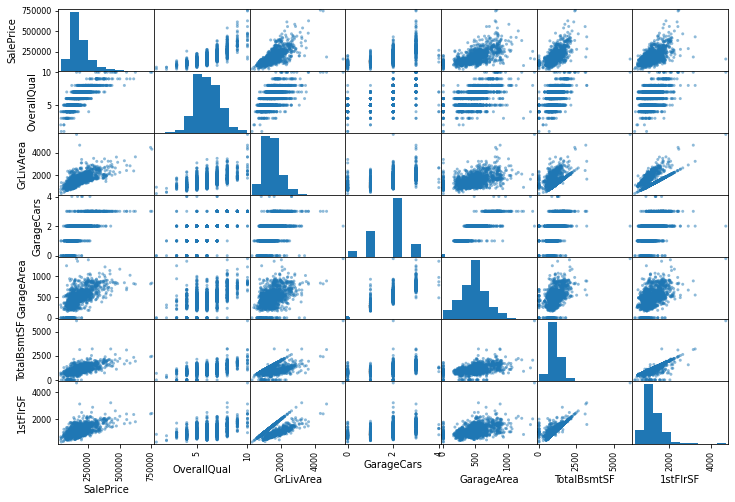

In [27]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']
scatter_matrix(home_price_train[attributes], figsize=(12, 8))
#savefig
plt.savefig('matrix.png')

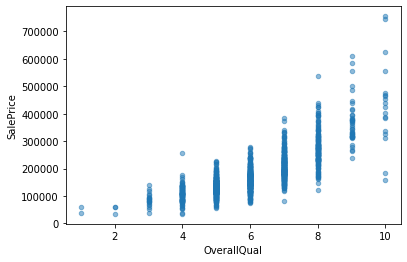

In [28]:
home_price_train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)
plt.savefig('scatter.png')

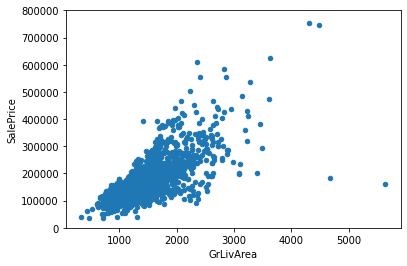

In [29]:
plotted_data = pd.concat([home_price_train['SalePrice'], home_price_train['GrLivArea']], axis=1)
plotted_data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

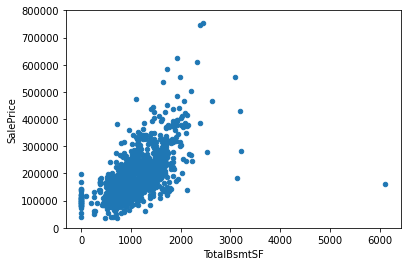

In [30]:
plotted_data = pd.concat([home_price_train['SalePrice'], home_price_train['TotalBsmtSF']], axis=1)
plotted_data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

In [31]:
from collections import Counter

column_cnt_train=home_price_train.select_dtypes(include=np.number).columns.tolist()
column_cnt_test=home_price_test.select_dtypes(include=np.number).columns.tolist()

colms=home_price_train.columns.values.tolist()
cnt= list((Counter(colms)-Counter(column_cnt_train)).elements())

In [32]:
home_price_test[column_cnt_test]=home_price_test[column_cnt_test].fillna(0)
home_price_train[column_cnt_train]=home_price_train[column_cnt_train].fillna(0)
#repalcing the empty list as unlabelled using fillna
home_price_test[cnt]=home_price_train[cnt].fillna('Unlabeled')
home_price_train[cnt]=home_price_train[cnt].fillna('Unlabeled')

In [33]:
home_price_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RL,80.0,11622,Pave,Unlabeled,Reg,Lvl,AllPub,...,120,0,Unlabeled,Unlabeled,Unlabeled,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Unlabeled,Reg,Lvl,AllPub,...,0,0,Unlabeled,Unlabeled,Unlabeled,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Unlabeled,IR1,Lvl,AllPub,...,0,0,Unlabeled,Unlabeled,Unlabeled,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Unlabeled,IR1,Lvl,AllPub,...,0,0,Unlabeled,Unlabeled,Unlabeled,0,6,2010,WD,Abnorml
4,1465,120,RL,43.0,5005,Pave,Unlabeled,IR1,Lvl,AllPub,...,144,0,Unlabeled,Unlabeled,Unlabeled,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,FV,21.0,1936,Pave,Pave,Reg,Lvl,AllPub,...,0,0,Unlabeled,Unlabeled,Unlabeled,0,6,2006,WD,Normal
1455,2916,160,RL,21.0,1894,Pave,Unlabeled,Reg,Lvl,AllPub,...,0,0,Unlabeled,Unlabeled,Unlabeled,0,4,2006,WD,Normal
1456,2917,20,RL,160.0,20000,Pave,Unlabeled,Reg,Lvl,AllPub,...,0,0,Unlabeled,MnPrv,Unlabeled,0,9,2006,WD,Normal
1457,2918,85,RL,62.0,10441,Pave,Unlabeled,Reg,Lvl,AllPub,...,0,0,Unlabeled,GdPrv,Shed,700,7,2006,WD,Normal


In [34]:
training_set = pd.get_dummies(home_price_train, columns=cnt)
X_train_data=training_set.drop(['SalePrice', 'Id'],axis=1)
y_train_data=training_set['SalePrice']

In [35]:
test_set = pd.get_dummies(home_price_test, columns=cnt)
x_test_data=test_set.drop(['Id'],axis=1)

In [36]:
X_train_data= home_price_train[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']]
y_train_data = home_price_train["SalePrice"]

X_test_data = home_price_test[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']]

home_price_test.fillna(0, inplace = True)

In [37]:
from sklearn.linear_model import LinearRegression
regress = LinearRegression()
regress.fit(X_train_data, y_train_data)

LinearRegression()

In [38]:
regress.score(X_train_data, y_train_data)


0.7619179511862831

In [39]:
predictions_data = regress.predict(X_test_data)
predicted_prices = pd.DataFrame({'Sale Price prediction': predictions_data})

predicted_prices

,Sale Price prediction
0,113457.503265
1,165325.401681
2,157177.041113
3,179836.887801
4,227017.198181
...,...
1454,59852.316790
1455,78847.395196
1456,151715.379533
1457,92258.212328
